In [2]:
import numpy as np
from matplotlib import pyplot as plt


In [4]:
# Define the Huber loss
class Huber:
    def __call__(self, t, c):
        s = t ** 2
        flag = (s > c ** 2)
        return flag * (2 * c * t - c ** 2) + (~flag) * s
    def __str__(self):
        return "Huber"

In [60]:
# Define the Trivial loss
class Trivial:
    def __call__(self, t, c):
        return t ** 2
    def __str__(self):
        return "Trivial"

In [6]:
# Define the SoftL1 loss
class SoftL1:
    def __call__(self, t, c):
        return 2 * (c ** 2) * (np.sqrt(1 + (t ** 2) / c ** 2) - 1)
    def __str__(self):
        return "SoftL1"

In [7]:
# Define the Cauchy loss
class Cauchy:
    def __call__(self, t, c):
        squared_t = t ** 2
        s = 1 + squared_t / (c ** 2)
        tmp = 1 / np.sqrt(s)
        return c ** 2 * np.log(s)
    def __str__(self):
        return "Cauchy"

In [8]:
# Define the Tukey loss
class Tukey:
    def __call__(self, t, c):
        squared_t = t ** 2
        flag = squared_t <= (c ** 2)
        value = 1 - squared_t / (c ** 2)
        value_sq = value * value
        inlier = flag * ((c ** 2) / 3.0 * (1.0 - value_sq * value))
        outlier = (~flag) * (c ** 2 / 3.0)
        return inlier + outlier
        
    def __str__(self):
        return "Tukey"

In [9]:
# Define the Arctan loss
class Arctan:
    def __call__(self, t, c):
        squared_t = t ** 2
        return c * np.arctan2(squared_t, c)
        
    def __str__(self):
        return "Arctan"

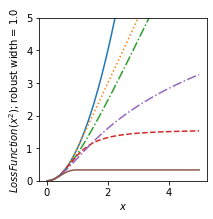

In [96]:
#------------------------------------------------------------
# Plot for several values of c
fig = plt.figure(figsize=(3, 3), )
ax = fig.add_subplot(111)

x = np.linspace(0, 5, 100)
robust_width = 1.0
line_types = ['-', ':', '-.', '--', '-.', '-']
loss_functions = [Trivial(), Huber(), SoftL1(), Arctan(), Cauchy(), Tukey(), ]
for lossFunction, line_type in zip(loss_functions, line_types):
    for c in (robust_width,):
        y = lossFunction(x, c)
        ax.plot(x, y, line_type, linewidth=1.5)

        if c > 10:
            s = r'\infty'
        else:
            s = str(c)

ax.set_xlabel('$x$')
ax.set_ylabel('$LossFunction(x^2)$; robust width = %s' % str(robust_width))
# ax.legend([str(l) for l in loss_functions], loc='upper left', bbox_to_anchor=(1.04,1))
plt.ylim(bottom=0, top=5)

# plt.show()
plt.savefig(f'loss_function_width_{robust_width}_0to1.png', dpi=300, bbox_inches='tight')


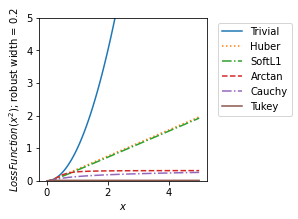

In [95]:
#------------------------------------------------------------
# Plot for several values of c
fig = plt.figure(figsize=(3, 3), )
ax = fig.add_subplot(111)

x = np.linspace(0, 5, 100)
robust_width = 0.2
line_types = ['-', ':', '-.', '--', '-.', '-']
loss_functions = [Trivial(), Huber(), SoftL1(), Arctan(), Cauchy(), Tukey(), ]
for lossFunction, line_type in zip(loss_functions, line_types):
    for c in (robust_width,):
        y = lossFunction(x, c)
        ax.plot(x, y, line_type, linewidth=1.5)

        if c > 10:
            s = r'\infty'
        else:
            s = str(c)

ax.set_xlabel('$x$')
ax.set_ylabel('$LossFunction(x^2)$; robust width = %s' % str(robust_width))
ax.legend([str(l) for l in loss_functions], loc='upper left', bbox_to_anchor=(1.04,1))
plt.ylim(bottom=0, top=5)

# plt.show()
plt.savefig(f'loss_function_width_{robust_width}_0to1.png', dpi=300, bbox_inches='tight')
